In [1]:
import qiskit
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram,plot_distribution
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, QiskitRuntimeService
from qiskit_aer import Aer, AerSimulator
from qiskit.circuit.library import UGate
import pylatexenc
import numpy as np

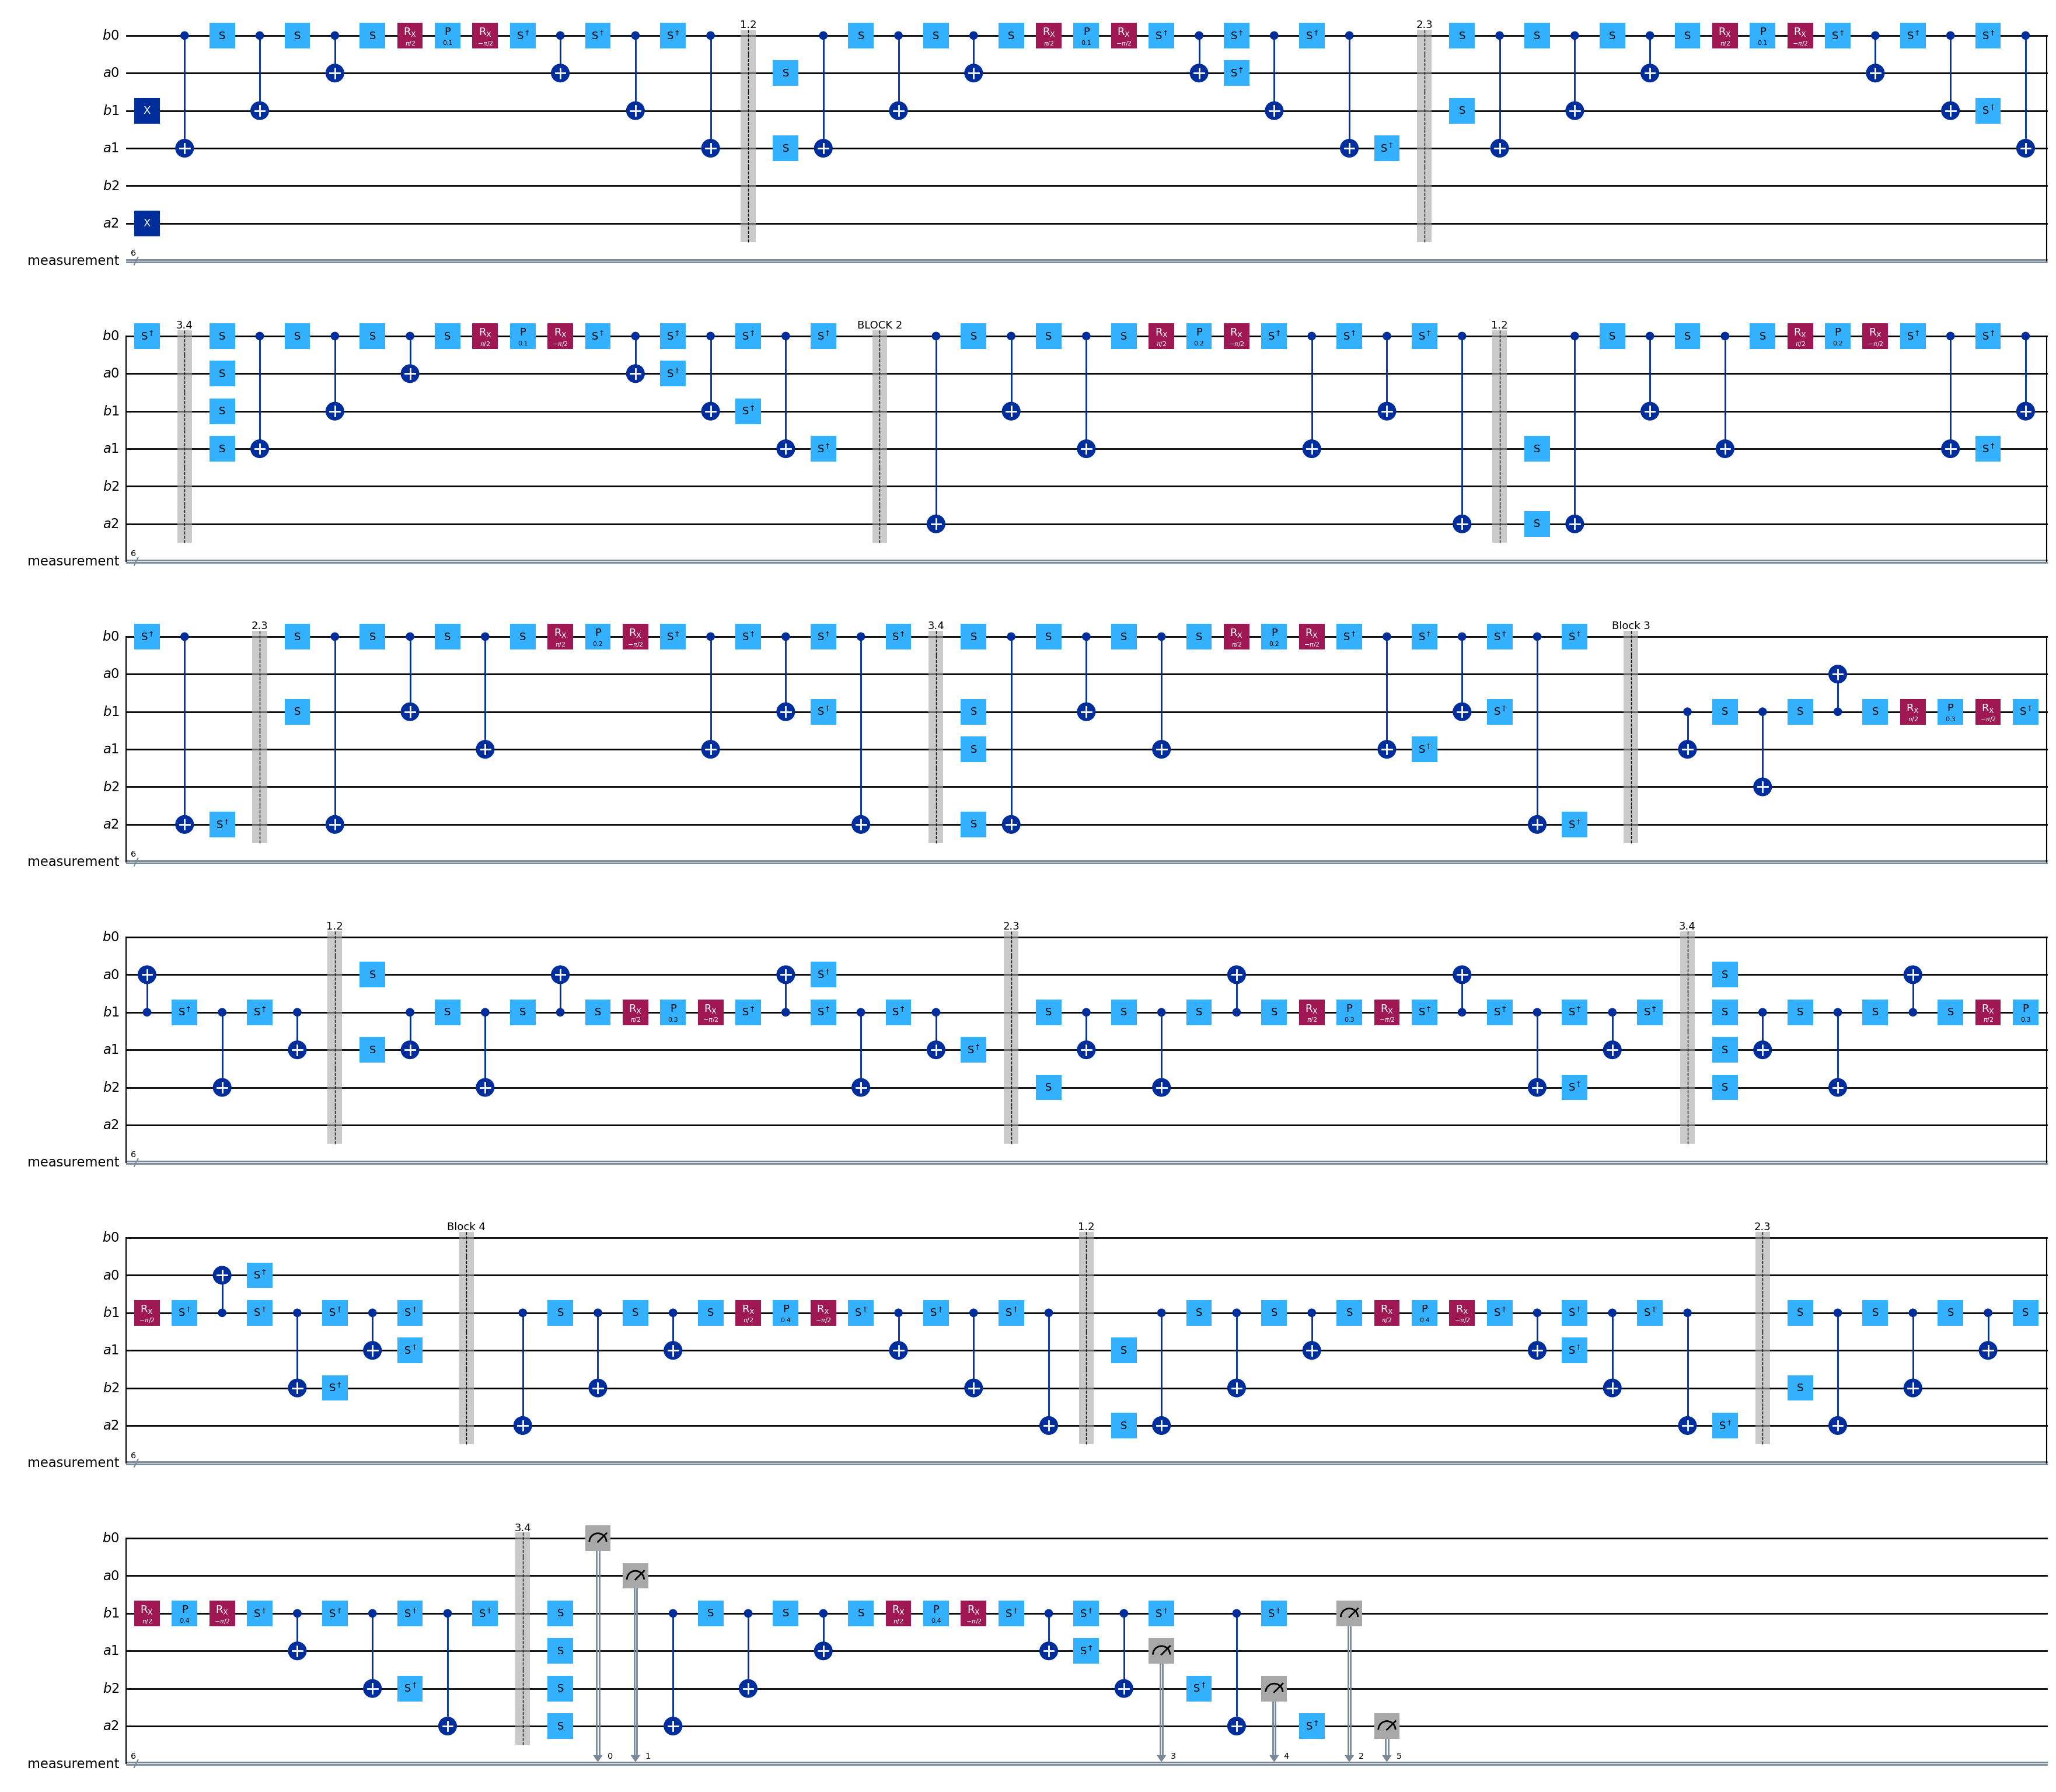

In [6]:
# DEFINE VARIABLES
theta_1 = 0.1
theta_2 = 0.2
theta_3 = 0.3
theta_4 = 0.4
b0 = QuantumRegister(1, "b0")
b1 = QuantumRegister(1,"b1")
b2 = QuantumRegister(1,"b2")

a0 = QuantumRegister(1, "a0")
a1 = QuantumRegister(1,"a1")
a2 = QuantumRegister(1,"a2")
creg = ClassicalRegister(6,name = "measurement")
quantum_circuit = QuantumCircuit(b0,a0,b1,a1,b2,a2,creg)
# INITIAL STATE 001001
quantum_circuit.x(b1)
quantum_circuit.x(a2)
# FIRST BLOCK H00
# STRING 1
quantum_circuit.cx(b0,a1)
quantum_circuit.s(b0)
quantum_circuit.cx(b0,b1)
quantum_circuit.s(b0)
quantum_circuit.cx(b0,a0)
quantum_circuit.s(b0)
quantum_circuit.rx(np.pi/2, b0)

quantum_circuit.p(theta_1,b0)

quantum_circuit.rx(-np.pi/2, b0)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,a0)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,b1)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,a1)
# barrier
quantum_circuit.barrier(label = "1.2")
# STRING 2
quantum_circuit.s(a1)
quantum_circuit.s(a0)
quantum_circuit.cx(b0,a1)
quantum_circuit.s(b0)
quantum_circuit.cx(b0,b1)
quantum_circuit.s(b0)
quantum_circuit.cx(b0,a0)
quantum_circuit.s(b0)
quantum_circuit.rx(np.pi/2, b0)

quantum_circuit.p(theta_1,b0)

quantum_circuit.rx(-np.pi/2, b0)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,a0)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,b1)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,a1)
quantum_circuit.sdg(a0)
quantum_circuit.sdg(a1)
# barrier
quantum_circuit.barrier(label = "2.3")
# STRING 3
quantum_circuit.s(b1)
quantum_circuit.s(b0)
quantum_circuit.cx(b0,a1)
quantum_circuit.s(b0)
quantum_circuit.cx(b0,b1)
quantum_circuit.s(b0)
quantum_circuit.cx(b0,a0)
quantum_circuit.s(b0)
quantum_circuit.rx(np.pi/2,b0)

quantum_circuit.p(theta_1, b0)

quantum_circuit.rx(-np.pi/2,b0)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,a0)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,b1)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,a1)
quantum_circuit.sdg(b0)
quantum_circuit.sdg(b1)
# barrier
quantum_circuit.barrier(label = "3.4")
# STRING 4
quantum_circuit.s(a1)
quantum_circuit.s(b1)
quantum_circuit.s(a0)
quantum_circuit.s(b0)
quantum_circuit.cx(b0,a1)
quantum_circuit.s(b0)
quantum_circuit.cx(b0,b1)
quantum_circuit.s(b0)
quantum_circuit.cx(b0,a0)
quantum_circuit.s(b0)
quantum_circuit.rx(np.pi/2,b0)

quantum_circuit.p(theta_1, b0)

quantum_circuit.rx(-np.pi/2,b0)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,a0)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,b1)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,a1)
quantum_circuit.sdg(b0)
quantum_circuit.sdg(a0)
quantum_circuit.sdg(b1)
quantum_circuit.sdg(a1)
# Barrier
quantum_circuit.barrier(label = "BLOCK 2")
# BLOCK 2
# STRING 1
quantum_circuit.cx(b0,a2)
quantum_circuit.s(b0)
quantum_circuit.cx(b0,b1)
quantum_circuit.s(b0)
quantum_circuit.cx(b0,a1)
quantum_circuit.s(b0)
quantum_circuit.rx(np.pi/2, b0)

quantum_circuit.p(theta_2,b0)

quantum_circuit.rx(-np.pi/2, b0)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,a1)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,b1)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,a2)
# BARRIER
quantum_circuit.barrier(label = "1.2")
# STRING 2
quantum_circuit.s(a2)
quantum_circuit.s(a1)
quantum_circuit.cx(b0,a2)
quantum_circuit.s(b0)
quantum_circuit.cx(b0,b1)
quantum_circuit.s(b0)
quantum_circuit.cx(b0,a1)
quantum_circuit.s(b0)
quantum_circuit.rx(np.pi/2, b0)

quantum_circuit.p(theta_2,b0)

quantum_circuit.rx(-np.pi/2, b0)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,a1)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,b1)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,a2)
quantum_circuit.sdg(a1)
quantum_circuit.sdg(a2)
# BARRIER 
quantum_circuit.barrier(label = "2.3")
# STRING 3
quantum_circuit.s(b1)
quantum_circuit.s(b0)
quantum_circuit.cx(b0,a2)
quantum_circuit.s(b0)
quantum_circuit.cx(b0,b1)
quantum_circuit.s(b0)
quantum_circuit.cx(b0,a1)
quantum_circuit.s(b0)
quantum_circuit.rx(np.pi/2,b0)

quantum_circuit.p(theta_2, b0)

quantum_circuit.rx(-np.pi/2,b0)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,a1)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,b1)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,a2)
quantum_circuit.sdg(b0)
quantum_circuit.sdg(b1)
# BARRIER 
quantum_circuit.barrier(label = "3.4")
# STRING 4
quantum_circuit.s(a2)
quantum_circuit.s(b1)
quantum_circuit.s(a1)
quantum_circuit.s(b0)
quantum_circuit.cx(b0,a2)
quantum_circuit.s(b0)
quantum_circuit.cx(b0,b1)
quantum_circuit.s(b0)
quantum_circuit.cx(b0,a1)
quantum_circuit.s(b0)
quantum_circuit.rx(np.pi/2,b0)

quantum_circuit.p(theta_2, b0)

quantum_circuit.rx(-np.pi/2,b0)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,a1)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,b1)
quantum_circuit.sdg(b0)
quantum_circuit.cx(b0,a2)
quantum_circuit.sdg(b0)
quantum_circuit.sdg(a1)
quantum_circuit.sdg(b1)
quantum_circuit.sdg(a2)
# BARRIER
quantum_circuit.barrier(label = "Block 3")
# BLOCK 3
# STRING 1
quantum_circuit.cx(b1,a1)
quantum_circuit.s(b1)
quantum_circuit.cx(b1,b2)
quantum_circuit.s(b1)
quantum_circuit.cx(b1,a0)
quantum_circuit.s(b1)
quantum_circuit.rx(np.pi/2, b1)

quantum_circuit.p(theta_3,b1)

quantum_circuit.rx(-np.pi/2, b1)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,a0)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,b2)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,a1)
# barrier
quantum_circuit.barrier(label = "1.2")
# STRING 2
quantum_circuit.s(a1)
quantum_circuit.s(a0)
quantum_circuit.cx(b1,a1)
quantum_circuit.s(b1)
quantum_circuit.cx(b1,b2)
quantum_circuit.s(b1)
quantum_circuit.cx(b1,a0)
quantum_circuit.s(b1)
quantum_circuit.rx(np.pi/2, b1)

quantum_circuit.p(theta_3,b1)

quantum_circuit.rx(-np.pi/2, b1)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,a0)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,b2)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,a1)
quantum_circuit.sdg(a0)
quantum_circuit.sdg(a1)
# barrier
quantum_circuit.barrier(label = "2.3")
# STRING 3
quantum_circuit.s(b2)
quantum_circuit.s(b1)
quantum_circuit.cx(b1,a1)
quantum_circuit.s(b1)
quantum_circuit.cx(b1,b2)
quantum_circuit.s(b1)
quantum_circuit.cx(b1,a0)
quantum_circuit.s(b1)
quantum_circuit.rx(np.pi/2,b1)

quantum_circuit.p(theta_3, b1)

quantum_circuit.rx(-np.pi/2,b1)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,a0)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,b2)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,a1)
quantum_circuit.sdg(b1)
quantum_circuit.sdg(b2)
# barrier
quantum_circuit.barrier(label = "3.4")
# STRING 4
quantum_circuit.s(a1)
quantum_circuit.s(b2)
quantum_circuit.s(a0)
quantum_circuit.s(b1)
quantum_circuit.cx(b1,a1)
quantum_circuit.s(b1)
quantum_circuit.cx(b1,b2)
quantum_circuit.s(b1)
quantum_circuit.cx(b1,a0)
quantum_circuit.s(b1)
quantum_circuit.rx(np.pi/2,b1)

quantum_circuit.p(theta_3, b1)

quantum_circuit.rx(-np.pi/2,b1)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,a0)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,b2)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,a1)
quantum_circuit.sdg(b1)
quantum_circuit.sdg(a0)
quantum_circuit.sdg(b2)
quantum_circuit.sdg(a1)
# Barrier 
quantum_circuit.barrier(label = "Block 4")
# BLOCK 4
# STRING 1
quantum_circuit.cx(b1,a2)
quantum_circuit.s(b1)
quantum_circuit.cx(b1,b2)
quantum_circuit.s(b1)
quantum_circuit.cx(b1,a1)
quantum_circuit.s(b1)
quantum_circuit.rx(np.pi/2, b1)

quantum_circuit.p(theta_4,b1)

quantum_circuit.rx(-np.pi/2, b1)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,a1)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,b2)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,a2)
# barrier
quantum_circuit.barrier(label = "1.2")
# STRING 2
quantum_circuit.s(a2)
quantum_circuit.s(a1)
quantum_circuit.cx(b1,a2)
quantum_circuit.s(b1)
quantum_circuit.cx(b1,b2)
quantum_circuit.s(b1)
quantum_circuit.cx(b1,a1)
quantum_circuit.s(b1)
quantum_circuit.rx(np.pi/2, b1)

quantum_circuit.p(theta_4,b1)

quantum_circuit.rx(-np.pi/2, b1)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,a1)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,b2)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,a2)
quantum_circuit.sdg(a1)
quantum_circuit.sdg(a2)
# barrier
quantum_circuit.barrier(label = "2.3")
# STRING 3
quantum_circuit.s(b2)
quantum_circuit.s(b1)
quantum_circuit.cx(b1,a2)
quantum_circuit.s(b1)
quantum_circuit.cx(b1,b2)
quantum_circuit.s(b1)
quantum_circuit.cx(b1,a1)
quantum_circuit.s(b1)
quantum_circuit.rx(np.pi/2,b1)

quantum_circuit.p(theta_4, b1)

quantum_circuit.rx(-np.pi/2,b1)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,a1)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,b2)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,a2)
quantum_circuit.sdg(b1)
quantum_circuit.sdg(b2)
# barrier
quantum_circuit.barrier(label = "3.4")
# STRING 4
quantum_circuit.s(a2)
quantum_circuit.s(b2)
quantum_circuit.s(a1)
quantum_circuit.s(b1)
quantum_circuit.cx(b1,a2)
quantum_circuit.s(b1)
quantum_circuit.cx(b1,b2)
quantum_circuit.s(b1)
quantum_circuit.cx(b1,a1)
quantum_circuit.s(b1)
quantum_circuit.rx(np.pi/2,b1)

quantum_circuit.p(theta_4, b1)

quantum_circuit.rx(-np.pi/2,b1)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,a1)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,b2)
quantum_circuit.sdg(b1)
quantum_circuit.cx(b1,a2)
quantum_circuit.sdg(b1)
quantum_circuit.sdg(a1)
quantum_circuit.sdg(b2)
quantum_circuit.sdg(a2)
quantum_circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
quantum_circuit.draw("mpl", fold = 51)


Raw Counts: {'100100': 432, '011000': 459, '001001': 133}


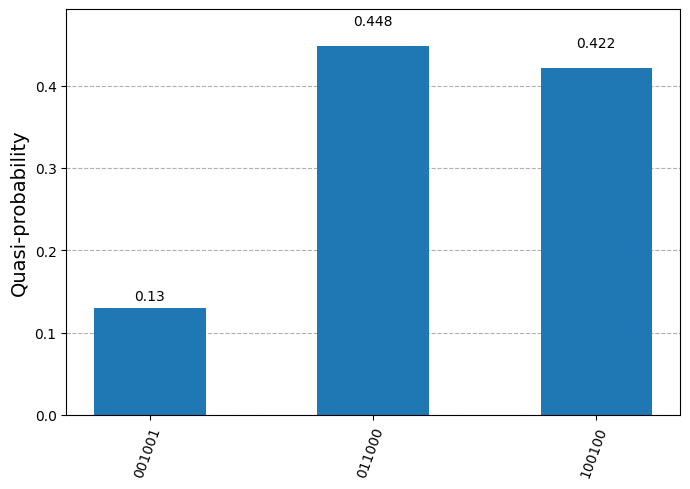

In [7]:
backend = AerSimulator()
pass_manager = generate_preset_pass_manager(backend=backend, optimization_level=3)
transpiled_circuit = pass_manager.run(quantum_circuit)

sampler = Sampler(mode=backend)
job_result = sampler.run([transpiled_circuit], shots=1024).result()
counts = job_result[0].data.measurement.get_counts()
# Note: The exact access pattern may vary with Qiskit version;
# sometimes it's .data.c or .data.meas — adjust accordingly based on your transpiled circuit.

print("Raw Counts:", counts)
plot_distribution(counts)